In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#pull in demographic info
csv_path = "Oscars-demographics-DFE.csv"
oscar_data = pd.read_csv(csv_path, encoding = "cp1252")
oscar_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [3]:
#pull out age data
age_data = oscar_data[["person","date_of_birth","year_of_award","award"]]


In [4]:
#split data of birth info
age_data[["Day","Month Name","Year"]] = age_data["date_of_birth"].str.split("-",3,expand = True)



C:\Users\diamondf\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
#assign month number
month_df = pd.DataFrame({"Month Name":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
            "Month": [1,2,3,4,5,6,7,8,9,10,11,12]})

age_data = pd.merge(age_data,month_df, on="Month Name")


In [6]:
#replace birth year data
birth_years = age_data["Year"].unique()
birth_years


age_data["Year"] = age_data["Year"].replace(['09', '14', '32', '46', '57', '23', '16', '44', '48', '60',
                                             '15', '34','04', '31', '72', '75', '67','69', '81','26', '39', 
                                             '27', '24', '25', '19', '08', '43', '30', '53', '45', '07',
                                             '42','18', '37', '40', '64', '73', '21', '79', '41', '59', '49', 
                                             '17', '29', '74','20', '52', '05', '12', '36', '61', '06','54', 
                                             '56', '47', '58', '35', '51', '22','11', '82', '38', '10', '71', '70',
                                             '28', '63','1936 [1]', '65', '33', '66', '90', '55', '68', '13',
                                             '50', '76', '83', '62'],
                                            [1909, 1914, 1932, 1946, 1957, 1923, 1916, 1944, 1948, 1960,
                                             1915, 1934,1904, 1931, 1972, 1975, 1967,1969, 1981,1926, 1939, 
                                             1927, 1924, 1925, 1919, 1908, 1943, 1930, 1953, 1945, 1907,
                                             1942,1918, 1937, 1940, 1964, 1973, 1921, 1979, 1941, 1959, 1949, 
                                             1917, 1929, 1974,1920, 1952, 1905, 1912, 1936, 1961, 1906,1954, 
                                             1956, 1947, 1958, 1935, 1951, 1922,1911, 1982, 1938, 1910, 1971, 1970,
                                             1928, 1963,1936, 1965, 1933, 1966, 1990, 1955, 1968,1913,
                                             1950, 1976, 1983, 1962])

In [7]:
#convert dob to date
age_data["Winner DOB"]= pd.to_datetime(age_data[["Day","Month","Year"]])

In [8]:
#add in award show date data and merge with age data
date_data_path = "Show_Dates.csv"
date_data = pd.read_csv(date_data_path)
age_data = pd.merge(age_data,date_data,on="year_of_award")

In [9]:
#convert award show date to date
age_data["Award Show Date"]= pd.to_datetime(age_data["Award Show Date"])


In [10]:
#calculate winner age at show date
winner_dob = age_data["Winner DOB"]
show_date = age_data["Award Show Date"]
age_data["Winner Age"] = (show_date-winner_dob)/np.timedelta64(1,'Y')

age_data["Winner Age"] = age_data["Winner Age"].apply(np.floor)
age_data

,person,date_of_birth,year_of_award,award,Day,Month Name,Year,Month,Winner DOB,Award Show Date,Winner Age
0,Lewis Milestone,30-Sep-1895,1931,Best Director,30,Sep,1895,9,1895-09-30,1931-11-10,36.0
1,Lionel Barrymore,28-Apr-1878,1931,Best Actor,28,Apr,1878,4,1878-04-28,1931-11-10,53.0
2,Marie Dressler,2-Nov-1868,1931,Best Actress,2,Nov,1868,11,1868-11-02,1931-11-10,63.0
3,Elia Kazan,7-Sep-09,1948,Best Director,7,Sep,1909,9,1909-09-07,1948-03-20,38.0
4,Edmund Gwenn,26-Sep-1875,1948,Best Supporting Actor,26,Sep,1875,9,1875-09-26,1948-03-20,72.0
...,...,...,...,...,...,...,...,...,...,...,...
434,James Dunn,2-Nov-1901,1946,Best Supporting Actor,2,Nov,1901,11,1901-11-02,1946-03-07,44.0
435,Marlee Matlin,24-Aug-65,1987,Best Actress,24,Aug,1965,8,1965-08-24,1987-03-30,21.0
436,Paul Newman,26-Jan-25,1987,Best Actor,26,Jan,1925,1,1925-01-26,1987-03-30,62.0
437,Michael Caine,14-Mar-33,1987,Best Supporting Actor,14,Mar,1933,3,1933-03-14,1987-03-30,54.0


In [11]:
#create dataset of only acting awards, and awards by actress or actor
acting_awards = age_data.loc[age_data["award"].isin(["Best Actor","Best Actress",
                                                    "Best Supporting Actress","Best Supporting Actor"]),
                                                    ["award","Winner Age","year_of_award"]]
actor_awards = age_data.loc[age_data["award"].isin(["Best Actor","Best Supporting Actor"]),
                                                    ["award","Winner Age","year_of_award"]]
actress_awards = age_data.loc[age_data["award"].isin(["Best Actress",
                                                    "Best Supporting Actress"]),
                                                    ["award","Winner Age","year_of_award"]]

acting_awards

,award,Winner Age,year_of_award
1,Best Actor,53.0,1931
2,Best Actress,63.0,1931
4,Best Supporting Actor,72.0,1948
5,Best Actor,57.0,1948
6,Best Supporting Actress,30.0,1948
...,...,...,...
434,Best Supporting Actor,44.0,1946
435,Best Actress,21.0,1987
436,Best Actor,62.0,1987
437,Best Supporting Actor,54.0,1987


In [12]:
#create range of ages and apply to actor dataframe
age_bins = (0,30,40,50,60,100)
bin_labels = ("Younger than 30 years","30-40 years","40-50 years","50-60 years","Older than 60 years")

acting_awards["Age Range"] = pd.cut(acting_awards["Winner Age"], age_bins,labels=bin_labels)
acting_agebins = pd.DataFrame(acting_awards.groupby("Age Range")["Age Range"].count())

actor_awards["Age Range"] = pd.cut(actor_awards["Winner Age"], age_bins,labels=bin_labels)
actor_agebins = pd.DataFrame(actor_awards.groupby("Age Range")["Age Range"].count())

actress_awards["Age Range"] = pd.cut(actress_awards["Winner Age"], age_bins,labels=bin_labels)
actress_agebins = pd.DataFrame(actress_awards.groupby("Age Range")["Age Range"].count())


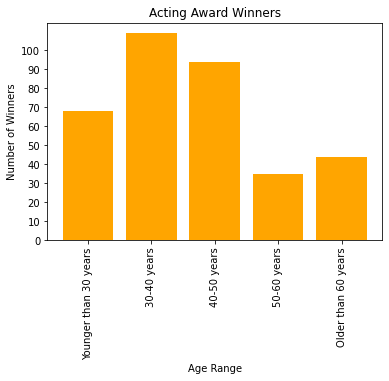

In [32]:
#plot acting award age data
act_age = acting_agebins.index
act_count = acting_agebins["Age Range"]

plt.bar(act_age,act_count, color = "orange")
plt.xlabel("Age Range")
plt.ylabel("Number of Winners")
plt.title("Acting Award Winners")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,max(act_count),10))

plt.savefig("Acting Age Range Chart.png")

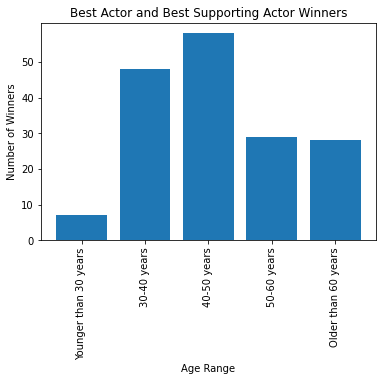

In [18]:
#plot best actor and best supp actor age data
actor_age = actor_agebins.index
actor_count = actor_agebins["Age Range"]

actor_chart = plt.bar(actor_age,actor_count)
plt.xlabel("Age Range")
plt.ylabel("Number of Winners")
plt.title("Best Actor and Best Supporting Actor Winners")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,max(actor_count),10))

plt.savefig("Actor Age Range Chart.png")

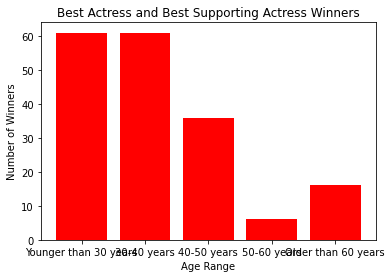

In [19]:
#plot best actress and best supp actress age data
actress_age = actress_agebins.index
actress_count = actress_agebins["Age Range"]

plt.bar(actress_age,actress_count, color = "red")
plt.xlabel("Age Range")
plt.ylabel("Number of Winners")
plt.title("Best Actress and Best Supporting Actress Winners")

plt.savefig("Actress Age Range Chart.png")

In [21]:
#apply age range to director awards
direct_awards = age_data.loc[age_data["award"].isin(["Best Director"]),["award","Winner Age","year_of_award"]]
direct_awards["Age Range"] = pd.cut(direct_awards["Winner Age"], age_bins,labels=bin_labels)
direct_awards


,award,Winner Age,year_of_award,Age Range
0,Best Director,36.0,1931,30-40 years
3,Best Director,38.0,1948,30-40 years
8,Best Director,45.0,1955,40-50 years
13,Best Director,46.0,1961,40-50 years
16,Best Director,54.0,1961,50-60 years
...,...,...,...,...
410,Best Director,40.0,1943,30-40 years
418,Best Director,34.0,2000,30-40 years
423,Best Director,43.0,1998,40-50 years
424,Best Director,47.0,1952,40-50 years


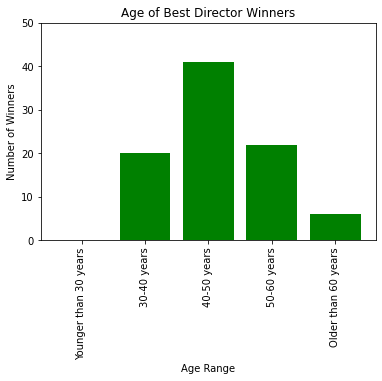

In [31]:
#plot director age data
direct_awards_agebins = pd.DataFrame(direct_awards.groupby("Age Range")["Age Range"].count())


dir_age_rng = direct_awards_agebins.index
dir_count = direct_awards_agebins["Age Range"]
                                   
plt.bar(dir_age_rng,dir_count, color = "green")
plt.xlabel("Age Range")
plt.ylabel("Number of Winners")
plt.title("Age of Best Director Winners")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,max(actor_count),10))

plt.savefig("Director Age Range Chart.png")

In [23]:
best_actress = acting_awards = age_data.loc[age_data["award"].isin(["Best Actress"]),
                                                    ["award","Winner Age","year_of_award"]]
best_actor = best_actress_only = acting_awards = age_data.loc[age_data["award"].isin(["Best Actor"]),
                                                    ["award","Winner Age","year_of_award"]]                                                   

In [24]:
best_actress_yr = pd.DataFrame(best_actress.groupby("year_of_award")["Winner Age"].mean())
best_actor_yr = pd.DataFrame(best_actor.groupby("year_of_award")["Winner Age"].mean())
direct_yr = pd.DataFrame(direct_awards.groupby("year_of_award")["Winner Age"].mean())

best_actress_age = best_actress_yr["Winner Age"]
best_actress_awdyr = best_actress_yr.index

best_actor_age = best_actor_yr["Winner Age"]
best_actor_awdyr = best_actor_yr.index

direct_age = direct_yr["Winner Age"]
direct_awdyr = direct_yr.index

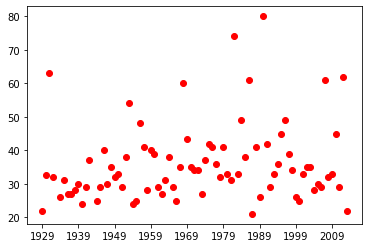

In [26]:
plt.scatter(best_actress_awdyr,best_actress_age, facecolor = "red")
plt.xticks(np.arange(min(best_actress_awdyr),max(best_actress_awdyr),10))

plt.savefig("Actress Scatter Plot.png")

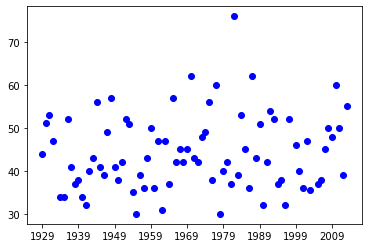

In [27]:
plt.scatter(best_actor_awdyr,best_actor_age, facecolor = "blue")
plt.xticks(np.arange(min(best_actor_awdyr),max(best_actor_awdyr),10))

plt.savefig("Actor Scatter Plot.png")

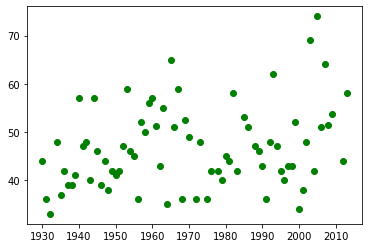

In [30]:
plt.scatter(direct_awdyr,direct_age, facecolor = "green")
plt.xticks(np.arange(min(direct_awdyr),max(direct_awdyr),10))

plt.savefig("Director Scatter Plot.png")